<a href="https://colab.research.google.com/github/hamagami/pycaret/blob/main/pycaret_anomaly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## PyCaretで試す異常検知（点異常検知）

pycaretをインストールします。
1分ほどかかります。他のモジュールとの依存関係について，いくつかエラーが表示されますが，今回の範囲では問題ありません，

In [3]:
!pip -q install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.2 MB/s 

実行に必要なモジュールをいくつか読み込みます

In [4]:
from pycaret.anomaly import *         #  PyCaretの異常検知関連のモジュールを読みこみます
from pycaret.datasets import get_data #  PyCaretが予め用意してくれいる色々なデータセットを取得するモジュールを読みこみます

import pandas as pd                   # pandasとは，表形式のデータを扱う便利なモジュールです　PyCaretの入出力はpandasのDataFrameと呼ぶ表形式のデータ型をつかいます
import matplotlib.pyplot as plt       # グラフを表示するモジュールを読みこみます


## 準備ができました。ここからPyCaretを実際に動かしていきます

### データの読み込み

まず，データを準備します。ここでは，PyCaretが予め演習用に用意してあるデータを使って基本的な動作をみています。次の行で， dataset という変数にデータが入ります。同時にdatasetに格納されたDataFrame形式の最初の数行が出力されます。

In [5]:
dataset = get_data("anomaly")

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,0.263995,0.764929,0.138424,0.935242,0.605867,0.518790,0.912225,0.608234,0.723782,0.733591
1,0.546092,0.653975,0.065575,0.227772,0.845269,0.837066,0.272379,0.331679,0.429297,0.367422
2,0.336714,0.538842,0.192801,0.553563,0.074515,0.332993,0.365792,0.861309,0.899017,0.088600
3,0.092108,0.995017,0.014465,0.176371,0.241530,0.514724,0.562208,0.158963,0.073715,0.208463
4,0.325261,0.805968,0.957033,0.331665,0.307923,0.355315,0.501899,0.558449,0.885169,0.182754


上記のように，このデータは Col1, Col2, .... Col10という属性（カラム）からなる10次元のデータです。正常か異常かのラベルはありません，このデータの中でどのサンプルが外れているかを教師なしで学習します。上の行では最初の５行程度しか表示されていませんが，データ全体の行数，列数は datasetのshape属性で確認できます。shape属性をみると下記のように1000行10列の表であることがわかります。

In [6]:
dataset.shape  # 1000行10列

(1000, 10)

本当はここで，各属性(カラム）の欠損を確認すべきところですが，今回は省略します。実際にはこのデータに欠損はありません。次に，各属性ごとのデータの分布をみておきます。分布を確認しなくてもこれ以降の処理は可能ですが，ある程度分布を押さえておくとトラブルシューティングの際に役立ちます。グラフを書くと，１～４程度のピークを持つ様々な分布を含んでいることがわかります。この程度のデータであっても，外れを直観的にみつけることは難しそうです。

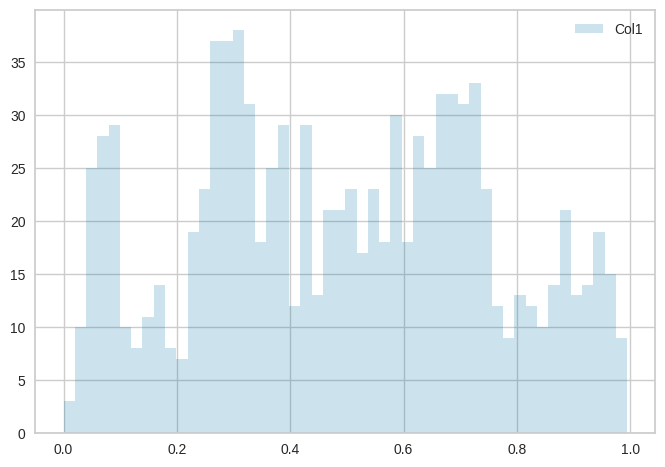

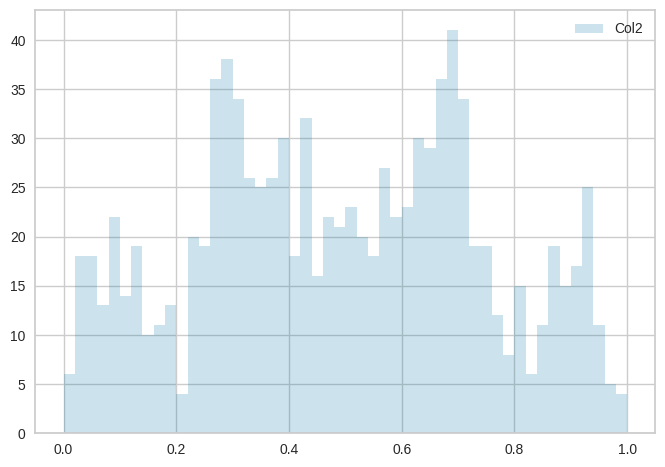

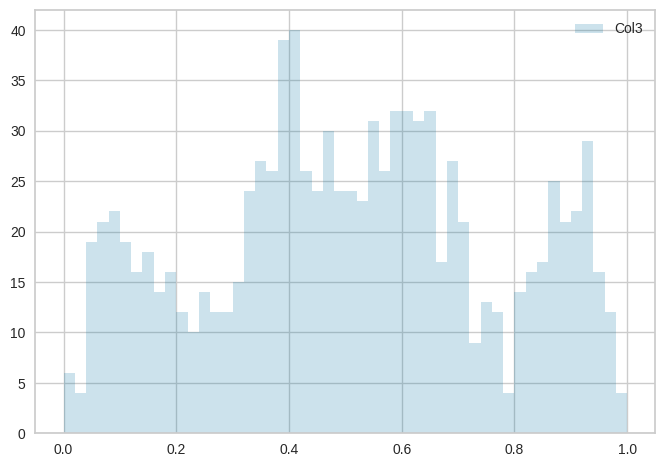

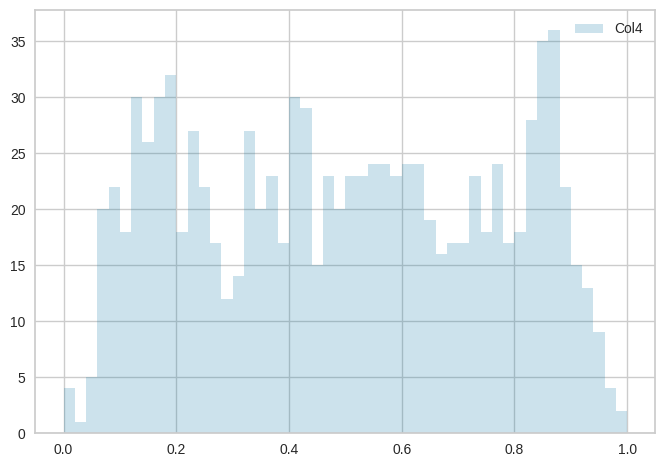

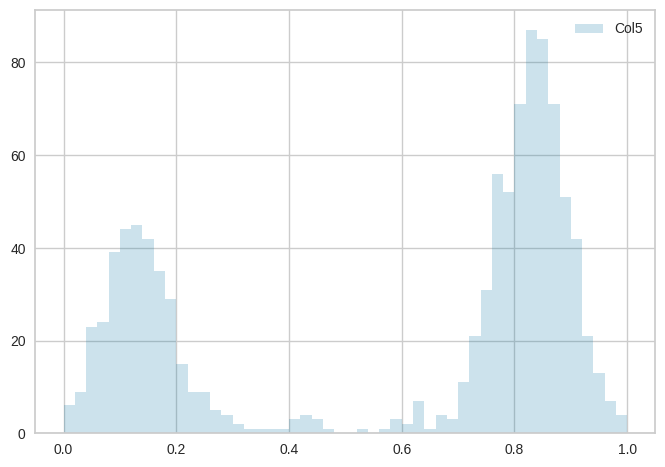

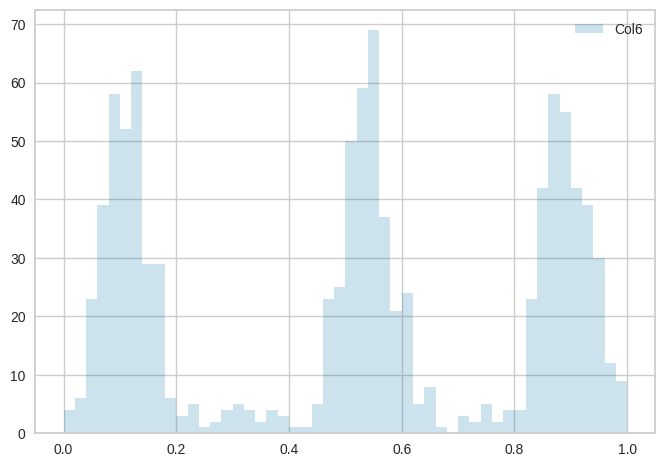

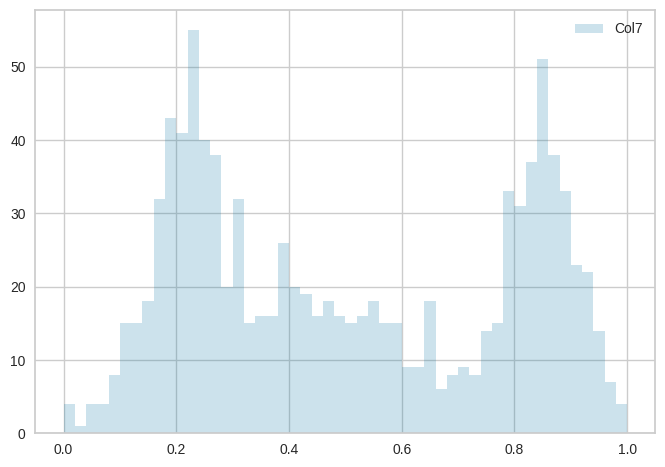

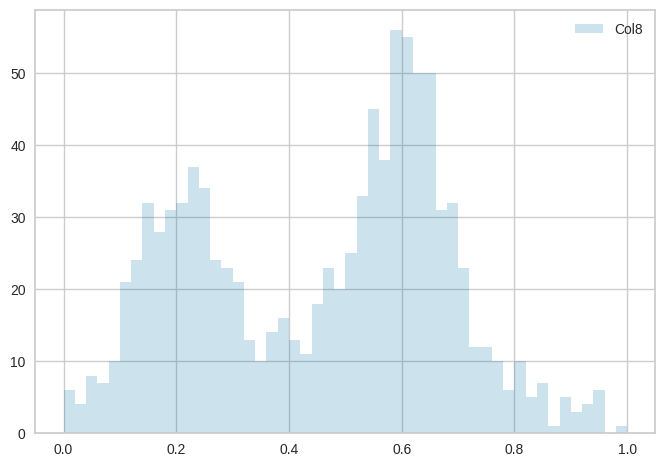

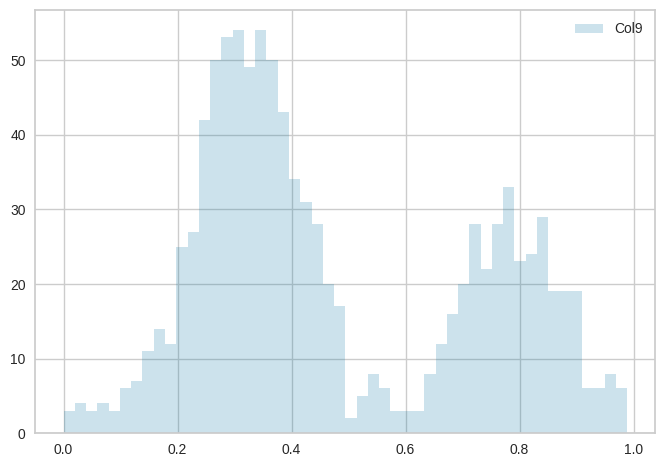

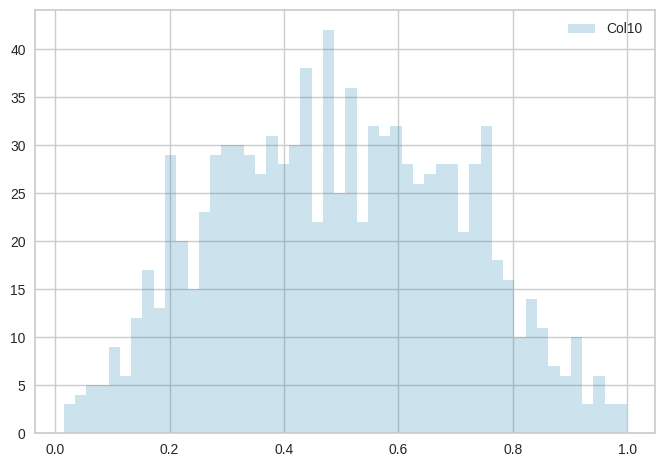

In [8]:
#以下の処理は理解できなくても問題ありません。各カラムごとに半透明のヒストグラムを重ねて書いています
for item, data in dataset.iteritems(): #１列ずつ取り出す
  plt.hist(data,bins=50,label=item,alpha=0.2)
  plt.legend()
  plt.show()

### セットアップ

PyCaretでは，面倒なデータの前処理を自動化するしくみがあります。これをsetupといいます。setupには，前処理のための様々なオプションがあります。ここでは，元のデータが0～1に規格化されているため，改めて標準化（各属性の分布を平均0,分散1にしまｓ）を行わないようにしています。予めデータの分布を確認して，必要に応じて標準化，正規化をするようにしてください。またデータ全体に占める異常の割合を3%と設定しています。このパラメータはあとでまた再検討します。setupを行うと，データに関する情報・操作内容の一覧が出力されます。

In [7]:
anoexe = setup(dataset,normalize=False,outliers_threshold=0.05) #データの範囲はほぼ0～1に収まっているので特段前処理を行わない設定にしている

,Description,Value
0,Session id,3663
1,Original data shape,"(1000, 10)"
2,Transformed data shape,"(1000, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


準備が整ったので，異常検知をためしてみます。
どのような異常検知アルゴリズムが使えるかは，models()で確認できます。

In [52]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pycaret.internal.patches.pyod.CBLOFForceToDouble
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA




---



---

## **knnによる異常検知**


knnの学習モデルをつくります

In [53]:
knn_model = create_model('knn')

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

knnの学習を行います

In [54]:
knn_results = assign_model(knn_model)

得られた結果を簡易的にグラフにします。横軸にデータ番号(0～999) 縦軸が異常度です。自動で設定された閾値に基づいて異常判定を行った結果を水色の帯で表しています。

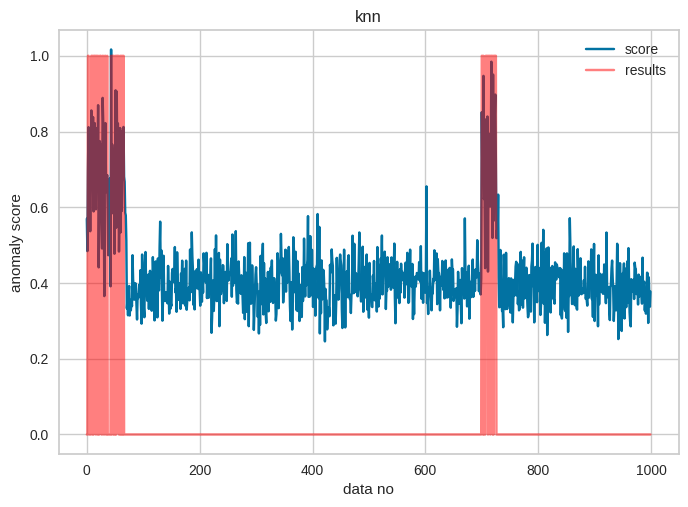

In [100]:
plt.plot(knn_results["Anomaly_Score"],label="score")
plt.plot(knn_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("knn")
plt.xlabel("data no")
plt.ylabel("anomaly score")
plt.legend()
plt.show()

異常度の分布を確認しおきます。水色が正常判定されたAnomaly_Score，オレンジが異常判定されたAnomaly_Scoreです。setupで全体の集合の5%が外れているという仮定で閾値がされているため，上位50までの外れが外れ値にしています。
このヒストグラムをみて，分布に基づく閾値（ネイマンピアソン決定則）を適用してもいいです。

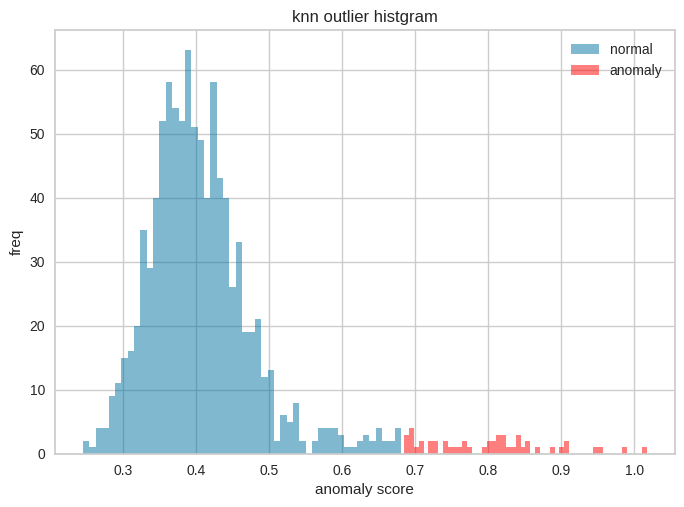

In [101]:
plt.hist(knn_results[knn_results["Anomaly"]==0]["Anomaly_Score"],bins=50,alpha=0.5,label="normal")
plt.hist(knn_results[knn_results["Anomaly"]==1]["Anomaly_Score"],bins=50,alpha=0.5,color="red",label="anomaly")
plt.title("knn outlier histgram")
plt.xlabel("anomaly score")
plt.ylabel("freq")
plt.legend()
plt.show()



---
## **局所外れ因子　Local Outlier Factor: LOF**



knnと同様にモデルの生成，学習を行います

In [61]:
lof_model = create_model('lof')
lof_results = assign_model(lof_model)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

異常度と判定結果を描画します。
異常度の値の範囲がknnとは異なりますが，ほぼ同じ個所で異常が検出できていることがわかります

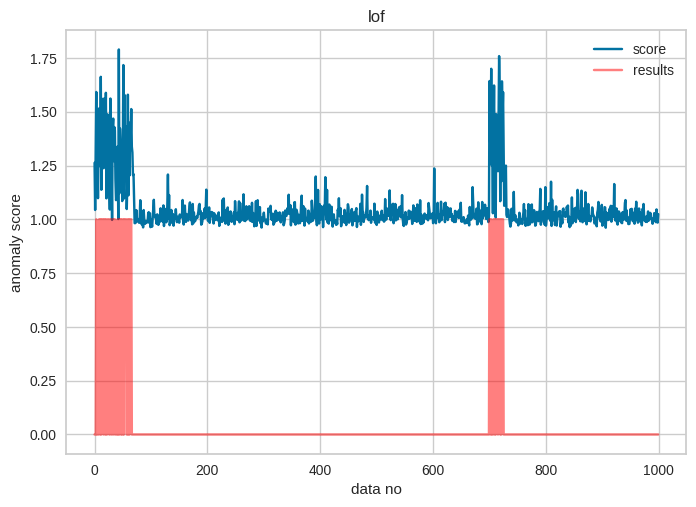

In [102]:
plt.plot(lof_results["Anomaly_Score"],label="score")
plt.plot(lof_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("lof")
plt.xlabel("data no")
plt.ylabel("anomaly score")
plt.legend()
plt.show()

異常度のヒストグラムをとると，knnに比べて正常データの凝集がより強くなっており，異常検知が容易になっていることがわかります。こちらもこの分布をもとに統計的な意味をもった閾値を再設定をすると，より厳密な異常検知となります。

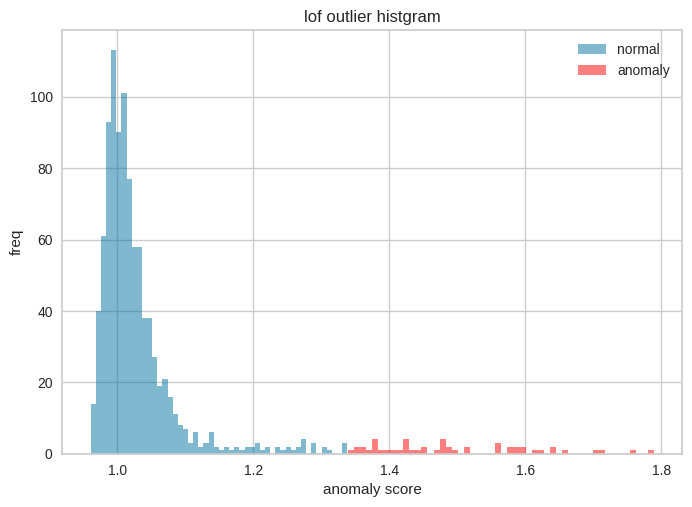

In [103]:
plt.hist(lof_results[lof_results["Anomaly"]==0]["Anomaly_Score"],bins=50,alpha=0.5,label="normal")
plt.hist(lof_results[lof_results["Anomaly"]==1]["Anomaly_Score"],bins=50,alpha=0.5,color="red",label="anomaly")
plt.title("lof outlier histgram")
plt.xlabel("anomaly score")
plt.ylabel("freq")
plt.legend()
plt.show()

## ABOD

他のアルゴリズムについても同様にみていきます

In [67]:
abod_model = create_model('abod')
abod_results = assign_model(abod_model)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

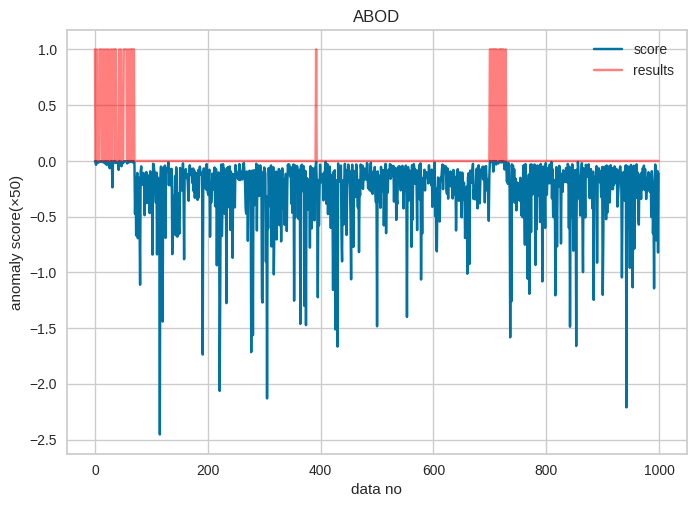

In [104]:
plt.plot(abod_results["Anomaly_Score"]/50,label="score")# 異常度のレンジが大きいため 1/50にして表示
plt.plot(abod_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("ABOD")
plt.xlabel("data no")
plt.ylabel("anomaly score(×50)")
plt.legend()
plt.show()

異常度の分布でみると，異常データは0付近の大変狭い領域内に凝集しているが，すぐそばに正常データも多くあり，正常と異常の境界が重なっていることがわかる。正常と異常の分離はできているが，このデータは10次元のため高次元に強いABODのメリットがあまり生かされていないと考えられる

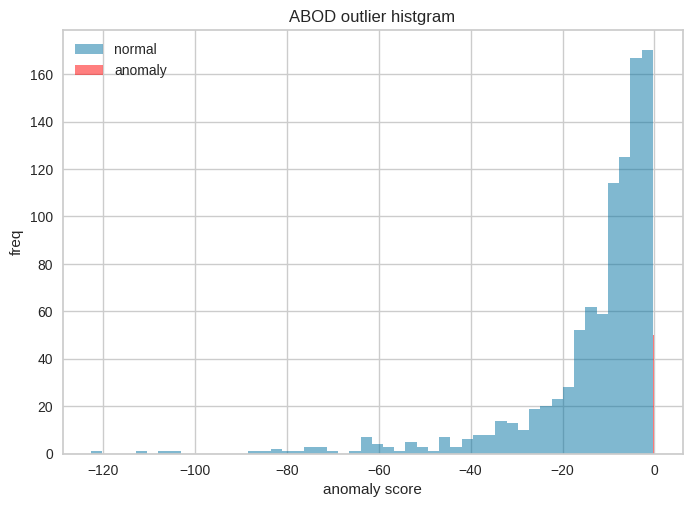

In [109]:
plt.hist(abod_results[abod_results["Anomaly"]==0]["Anomaly_Score"],bins=50,alpha=0.5,label="normal")
plt.hist(abod_results[abod_results["Anomaly"]==1]["Anomaly_Score"],bins=1,alpha=0.5,color="red",label="anomaly")
plt.title("ABOD outlier histgram")
plt.xlabel("anomaly score")
plt.ylabel("freq")
plt.legend()
plt.show()



---

# **HBOS**

In [92]:
hbos_model = create_model('histogram')
hbos_results = assign_model(hbos_model)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

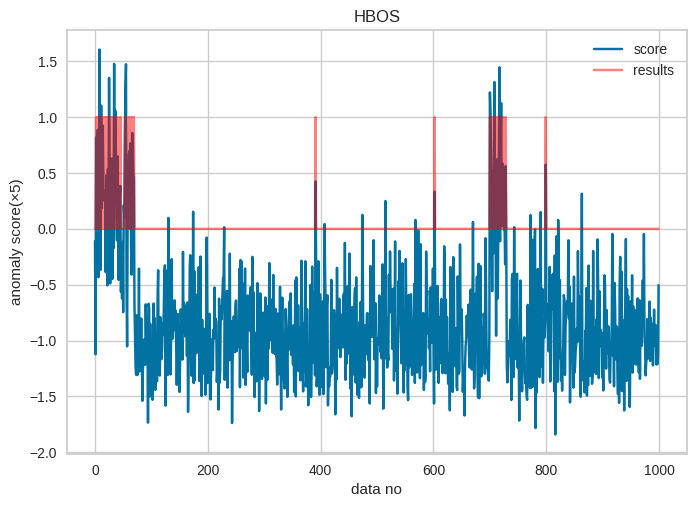

In [99]:
plt.plot(hbos_results["Anomaly_Score"]/5,label="score") #レンジを合わせるため1/5している
plt.plot(hbos_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("HBOS")
plt.xlabel("data no")
plt.ylabel("anomaly score(×5)")
plt.legend()
plt.show()

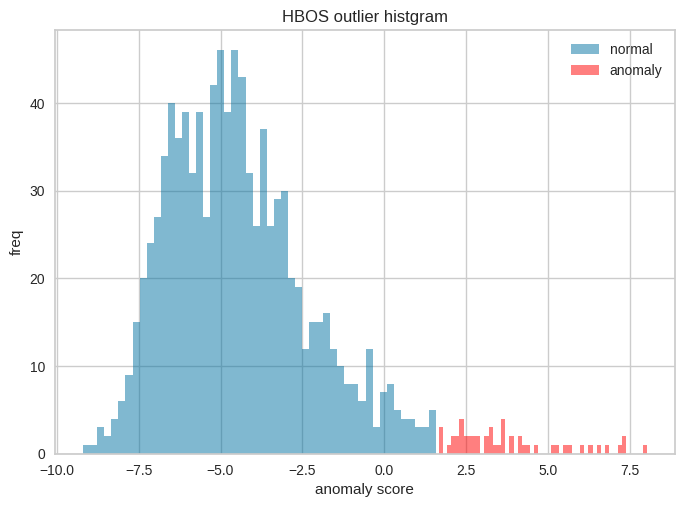

In [107]:
plt.hist(hbos_results[hbos_results["Anomaly"]==0]["Anomaly_Score"],bins=50,alpha=0.5,label="normal")
plt.hist(hbos_results[hbos_results["Anomaly"]==1]["Anomaly_Score"],bins=50,alpha=0.5,color="red",label="anomaly")
plt.title("HBOS outlier histgram")
plt.xlabel("anomaly score")
plt.ylabel("freq")
plt.legend()
plt.show()



---

# **クラスタリング**

In [110]:
clust_model = create_model('cluster')
clust_results = assign_model(clust_model)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

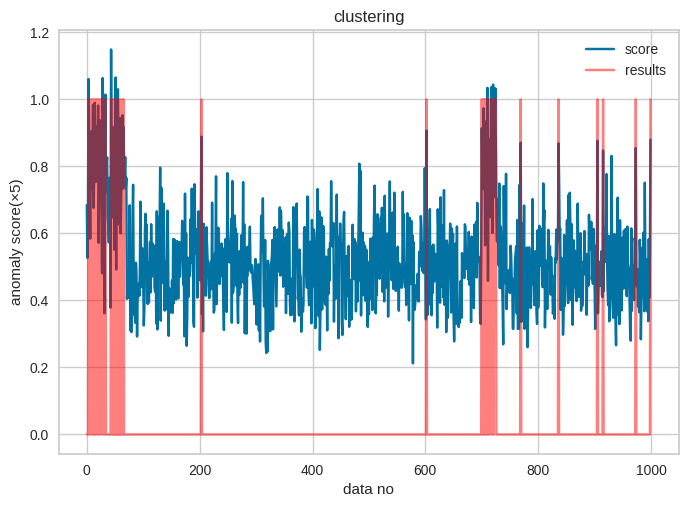

In [112]:
plt.plot(clust_results["Anomaly_Score"],label="score")
plt.plot(clust_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("clustering")
plt.xlabel("data no")
plt.ylabel("anomaly score(×5)")
plt.legend()
plt.show()

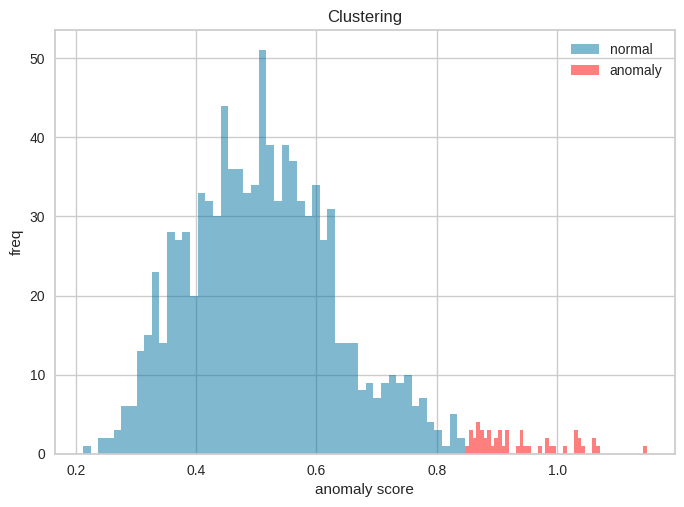

In [116]:
plt.hist(clust_results[clust_results["Anomaly"]==0]["Anomaly_Score"],bins=50,alpha=0.5,label="normal")
plt.hist(clust_results[clust_results["Anomaly"]==1]["Anomaly_Score"],bins=50,alpha=0.5,color="red",label="anomaly")
plt.title("Clustering")
plt.xlabel("anomaly score")
plt.ylabel("freq")
plt.legend()
plt.show()



---
## **部分空間法**


In [113]:
sod_model = create_model('sod')
sod_results = assign_model(sod_model)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

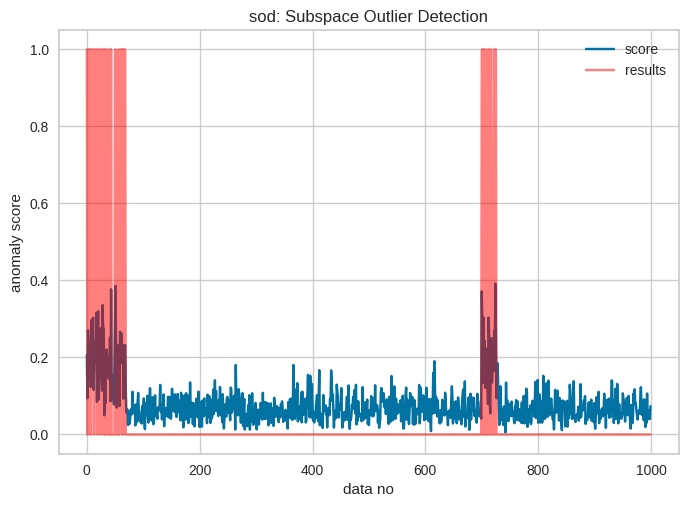

In [117]:
plt.plot(sod_results["Anomaly_Score"],label="score")
plt.plot(sod_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("sod: Subspace Outlier Detection")
plt.xlabel("data no")
plt.ylabel("anomaly score")
plt.legend()
plt.show()

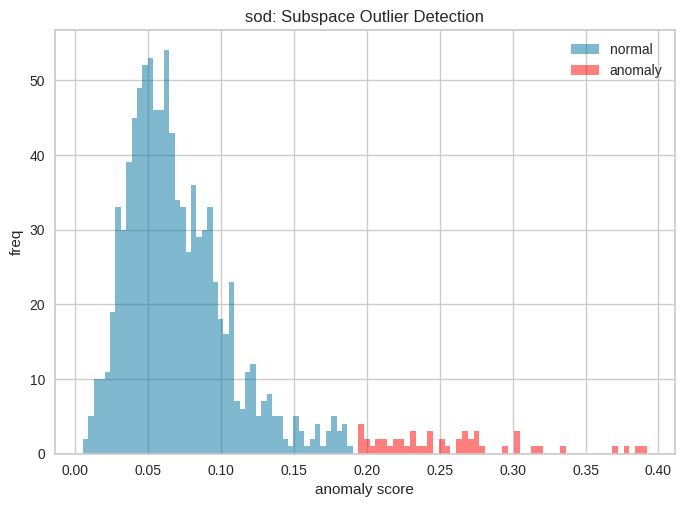

In [118]:
plt.hist(sod_results[sod_results["Anomaly"]==0]["Anomaly_Score"],bins=50,alpha=0.5,label="normal")
plt.hist(sod_results[sod_results["Anomaly"]==1]["Anomaly_Score"],bins=50,alpha=0.5,color="red",label="anomaly")
plt.title("sod: Subspace Outlier Detection")
plt.xlabel("anomaly score")
plt.ylabel("freq")
plt.legend()
plt.show()



---
## **PCA, MCD**


In [119]:
pca_model = create_model('pca')
pca_results = assign_model(pca_model)

Processing:   0%|          | 0/3 [00:00<?, ?it/s]

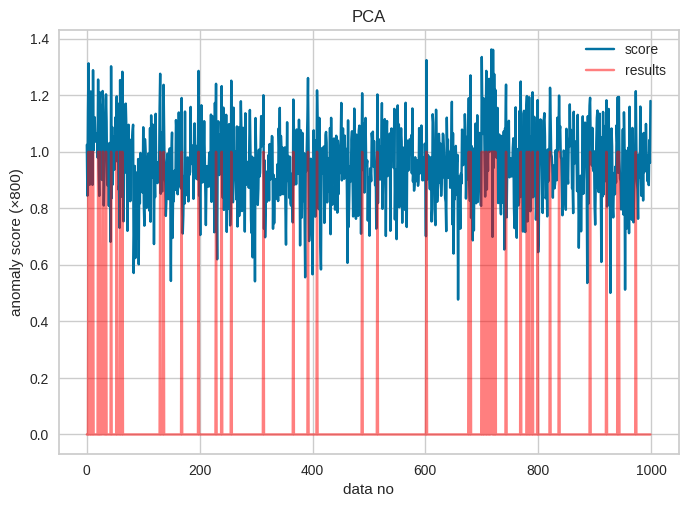

In [122]:
plt.plot(pca_results["Anomaly_Score"]/800,label="score")
plt.plot(pca_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("PCA")
plt.xlabel("data no")
plt.ylabel("anomaly score (×800)")
plt.legend()
plt.show()

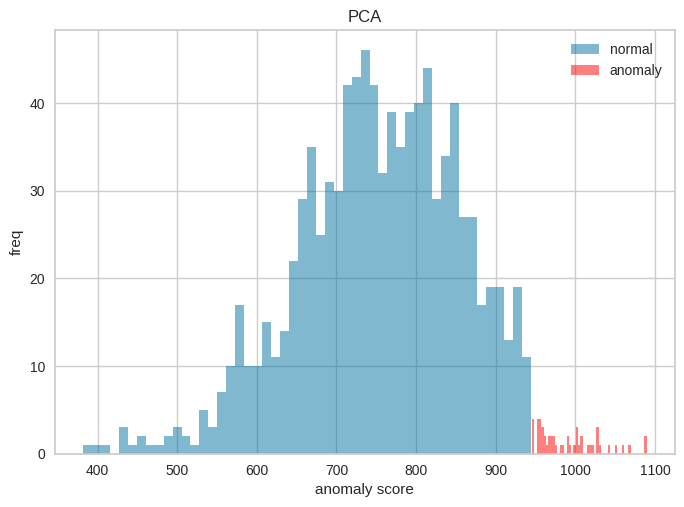

In [123]:
plt.hist(pca_results[pca_results["Anomaly"]==0]["Anomaly_Score"],bins=50,alpha=0.5,label="normal")
plt.hist(pca_results[pca_results["Anomaly"]==1]["Anomaly_Score"],bins=50,alpha=0.5,color="red",label="anomaly")
plt.title("PCA")
plt.xlabel("anomaly score")
plt.ylabel("freq")
plt.legend()
plt.show()

In [124]:
mcd_model = create_model('mcd')
mcd_results = assign_model(mcd_model)


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

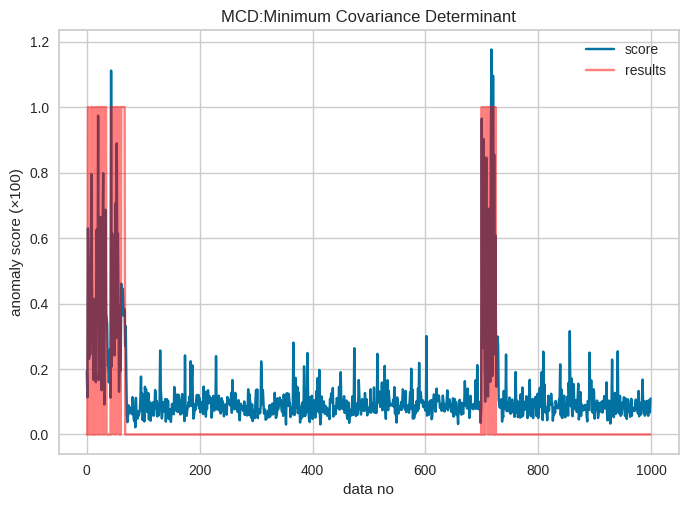

In [130]:
plt.plot(mcd_results["Anomaly_Score"]/100,label="score")
plt.plot(mcd_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("MCD:Minimum Covariance Determinant")
plt.xlabel("data no")
plt.ylabel("anomaly score (×100)")
plt.legend()
plt.show()

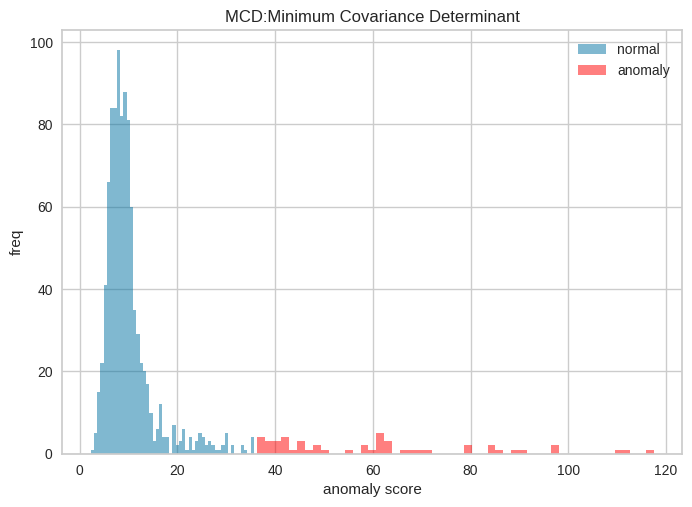

In [129]:
plt.hist(mcd_results[mcd_results["Anomaly"]==0]["Anomaly_Score"],bins=50,alpha=0.5,label="normal")
plt.hist(mcd_results[mcd_results["Anomaly"]==1]["Anomaly_Score"],bins=50,alpha=0.5,color="red",label="anomaly")
plt.title("MCD:Minimum Covariance Determinant")
plt.xlabel("anomaly score")
plt.ylabel("freq")
plt.legend()
plt.show()



---
# **one class SVM**


In [25]:
svm_model = create_model('svm', kernel="rbf", fraction=0.01)
svm_results = assign_model(svm_model)


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

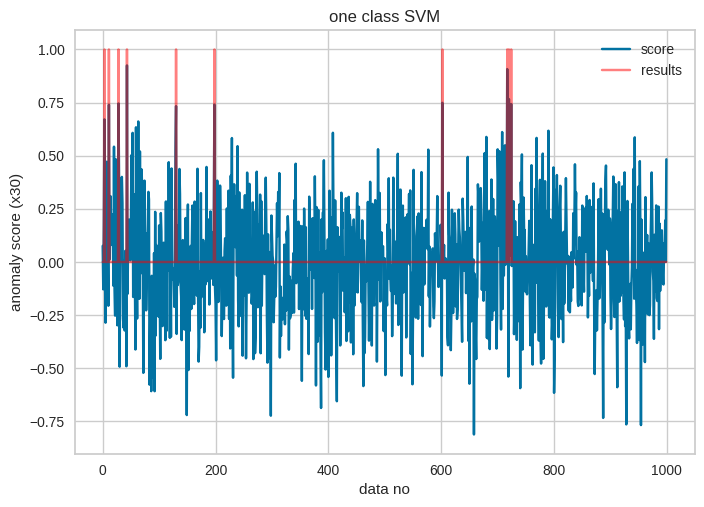

In [26]:
plt.plot(svm_results["Anomaly_Score"]/30,label="score")
plt.plot(svm_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("one class SVM")
plt.xlabel("data no")
plt.ylabel("anomaly score (x30)")
plt.legend()
plt.show()



---

# **isolation forest**

In [27]:
if_model = create_model('iforest', fraction=0.01)
if_results = assign_model(if_model)


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

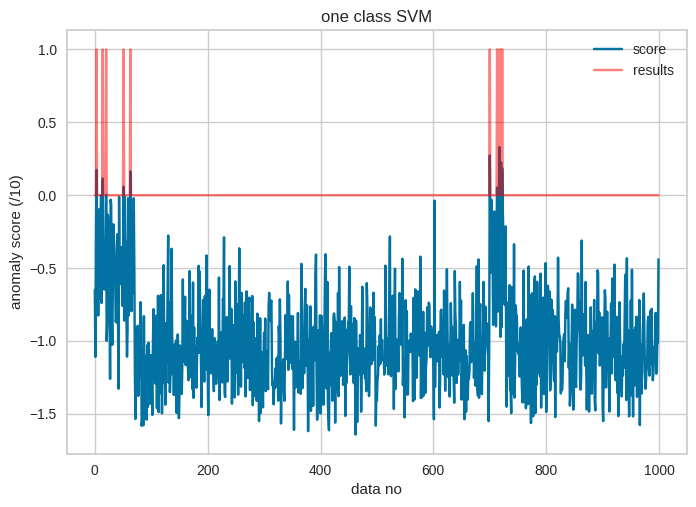

In [31]:
plt.plot(if_results["Anomaly_Score"]*10,label="score")
plt.plot(if_results["Anomaly"],alpha=0.5,label="results",color="red")
plt.title("one class SVM")
plt.xlabel("data no")
plt.ylabel("anomaly score (/10)")
plt.legend()
plt.show()